In [ ]:
#Polynomial Regression:
#y = b+W1*X to the power 0 + W2 * X + W3 *X square
#We will use the same linear regresion function from Scikit learn 
#need to identify b, W1, W2, W3

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [11]:
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [15]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

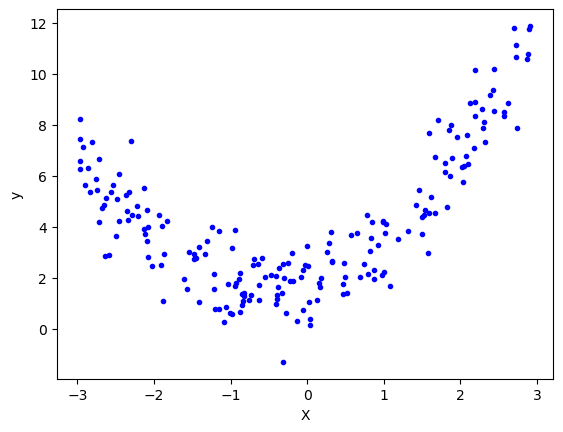

In [27]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [29]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
# Applying linear regression
lr = LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

-0.2024104224201022

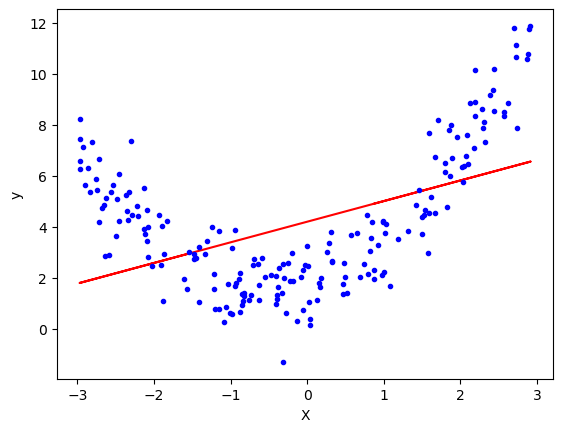

In [41]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

As the above R square error is bad we would be converting the X values into polynomial features and again using the regression model

In [43]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [47]:
X_train[0]

array([0.87363765])

In [49]:
X_train_trans[0]

array([1.        , 0.87363765, 0.76324274])

In [51]:
lr = LinearRegression()

In [53]:
lr.fit(X_train_trans, y_train)

LinearRegression()

In [55]:
y_pred = lr.predict(X_test_trans)

In [71]:
r2= r2_score(y_test,y_pred)
r2

0.8342285473294351

In [59]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.85544284 0.82063665]]
[1.8121459]


In [65]:
n = X.shape[0]
n

200

In [67]:
p = 1

In [69]:
adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
adj_r2

0.8333913177704928